# K-nearest Neighbors - k-NN

O algoritmo k-vizinhos mais próximos (k-NN) é um método não paramétrico usado para classificação e regressão. Nos dois casos, a entrada consiste nos k(matrizes) exemplos de treinamento. A saída depende se k-NN é usado para classificação ou regressão:
Na classificação k-NN, a saída é uma associação de classe. Um objeto é classificado pelo voto de pluralidade de seus vizinhos, sendo o objeto atribuído à classe mais comum entre os k-vizinhos mais próximos (k é um número inteiro positivo, geralmente pequeno). Se k = 1, o objeto é simplesmente atribuído à classe do único vizinho mais próximo, a forma mais comun de achar a classe é utilizando a distância vetorial das matrizes k-dados em relação as as matrizes k-modelo.
Na regressão k-NN, a saída é o valor da propriedade para o objeto. Este valor é a média dos valores de k vizinhos mais próximos.

### Processamento dos dados

#### Banco de dados
No exemplo irei utilizar um banco de dados onde mostra o clima, e a classe com valores binários 1 ou 0 onde 1 é jogou, 0 não jogou. Neste exemplo vou aplicar o k-NN para prevê baseado no clima, se haverá jogo ou não.

In [1]:
print(open('dados/001.csv', 'r').read())

clima,temperatura,jogou
"Ensolarado","Quente","Sim"
"Ensolarado","Quente","Nao"
"Nublado","Quente","Sim"
"Chuvoso","Suave","Sim"
"Chuvoso","Legal","Sim"
"Chuvoso","Legal","Nao"
"Nublado","Legal","Sim"
"Ensolarado","Suave","Nao"
"Ensolarado","Legal","Sim"
"Chuvoso","Suave","Sim"
"Ensolarado","Suave","Sim"
"Nublado","Suave","Sim"
"Nublado","Quente","Sim"
"Chuvoso","Suave","Nao"


In [19]:
from sklearn import preprocessing
import pandas as pd
import numpy as np

#Abrindo o dados como Dataframe
dados = pd.read_csv('dados/001.csv')

#Iniciando o método para binanizar as classe sim=1; não=0
pre = preprocessing.LabelBinarizer()

#Binazirando a classe jogou, e atribuíndo a uma matriz n-dimencional
y_binary = pre.fit_transform(dados['jogou'])
y = np.array(y_binary, dtype=np.int32).ravel()# utilize o ravel() para remover um n-dimensão dos elementos

print(y)

[1 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [6]:
#Vamos ver a dimensão desta matriz: no caso o resultado foi 14x1, ou seja 14 coluna por 0 linhas.
print(y.shape)

(14,)


In [7]:
#Agora iremos transformar os rótulos em números... seguindo a lógica sequêncial A, B, B tal que A=1; B=2; C=2 ....

#Adicionando todos os dados em lista
lista_clima = [x for x in dados['clima']]
lista_temperatura = [x for x in dados['temperatura']]
lista_jogou = [x for x in dados['jogou']]

#Iniciando o algoritmo que irá converter os rótulos em números
pre = preprocessing.LabelEncoder()

#Convertendo os rótulos em números e atribuindo em variáveis
clima_encoding = pre.fit_transform(lista_clima)
temperatura_encoding = pre.fit_transform(lista_temperatura)
jogou_encoding = pre.fit_transform(lista_jogou)

#Juntando tudo em túplas de 3 elementos númericos
lista = list(zip(clima_encoding, temperatura_encoding, jogou_encoding))

#Vamos ver o resultado
print(lista)

[(1, 1, 1), (1, 1, 0), (2, 1, 1), (0, 2, 1), (0, 0, 1), (0, 0, 0), (2, 0, 1), (1, 2, 0), (1, 0, 1), (0, 2, 1), (1, 2, 1), (2, 2, 1), (2, 1, 1), (0, 2, 0)]


In [9]:
#Atribuíndo os rótulos a uma matriz n-dimensional
X = np.array(lista, dtype=np.int32)

#Visualizando os dados em DataFrame
colunas = ['A', 'B', 'C']
print(pd.DataFrame(X, columns=colunas, dtype=np.int32))

    A  B  C
0   1  1  1
1   1  1  0
2   2  1  1
3   0  2  1
4   0  0  1
5   0  0  0
6   2  0  1
7   1  2  0
8   1  0  1
9   0  2  1
10  1  2  1
11  2  2  1
12  2  1  1
13  0  2  0


In [10]:
#Visualizando os dados da Classe em DataFrame
print(pd.DataFrame(y, columns=['Classe'], dtype=np.int32))

    Classe
0        1
1        0
2        1
3        1
4        1
5        0
6        1
7        0
8        1
9        1
10       1
11       1
12       1
13       0


In [11]:
#Podemos também vizualizar os dados em gráficos, no exemplo iremos utilizar o matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

Soma dos rótulos: [3, 2, 4, 3, 1, 0, 3, 3, 2, 3, 4, 5, 4, 2]
Classe: [1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


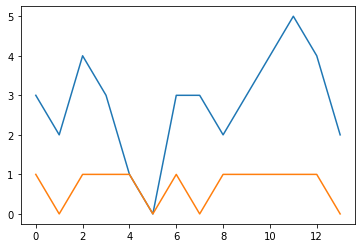

In [15]:
#Ajustando os dados para produzir o gráfico
xX = []
for i, x in enumerate(X):
    xX.append([list(x), y[i][0]])

dX = [(x[0][0] + x[0][1] + x[0][2]) for x in xX]
dY = [x[1] for x in xX]

print('Soma dos rótulos:', dX)
print('Classe:', dY)

fig, ax = plt.subplots()
ax.plot(dX)
ax.plot(dY)
plt.show()

No plot acima podemos ver a quantidade de jogos em relação ao clima(a soma dos eventos climáticos).

#### Aplicando o modelo de k-NN

Vamos aplicar o classificador usando o sklearn.

In [31]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

#Dividido os dados, onde o treinamento ficará com 75% e teste 25%, eu sempre uso este padrão :)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=0)

print(X_train) #Dados dos rótulos

[[2 1 1]
 [0 2 0]
 [0 2 1]
 [1 1 0]
 [1 2 0]
 [1 2 1]
 [0 2 1]
 [1 1 1]
 [0 0 0]
 [2 1 1]]


In [24]:
print(y_train) #Dados das classes

[1 1 1 1 1 1 1 0 0 1]


In [34]:
#Gerando o modelo, vou deixar os parâmetros padrão
knn = KNeighborsClassifier(n_neighbors=3)

#Treinando o modelo
knn.fit(X=X_train, y=y_train)

#Avaliando a pontuação do modelo, usando os dados de teste
pontuacao = str(accuracy_score(knn.predict(X_test), y_test) * 100)
print("Precisão: "+pontuacao+"%")

Precisão: 75.0%
